# Workshop 3: Linear, Time-Invariant Systems
## 3.1 Continuous-Time Systems: Convolution Integral
#### Convolution Integral (Superposition Integral)
$$y(t)) = \int_{-\infty}^{\infty} x(\tau)h(t-\tau)d\tau$$
This corresponds to the representaton of the continous time linear time-invariant (LTI) system in terms of its response to a unit impulse.
$$y(t) = x(t)*h(t)$$
Where $h(t)$ is the impulse response of the system and $x(t)$ is the input to the system.

A continuous-time LTI system is completely characterized by its response
to a single elementary signal, the unit impulse $\delta(t)$


### 3.1.1 Implementing Convolution Using Numerical Integration
Let $x(t) be the input to an LTI system with unit impulse response $h(t)$.

Where,
$$x(t) = e^{-at}u(t), a >0$$
and
$$h(t) = u(t).$$
Output of the system is
$$y(t) = x(t)*h(t)$$
Which is obtained when x(t) is fed to the system represented by $h(t)$.
![](image3.1.1.png)


for $t<0$,
$$x(\tau)h(t-\tau) = 0 => y(t) = 0$$

for $t>0$,
$$x(\tau)h(t-\tau) = \left\{
\begin{array}{ll}
      e^{-a\tau} & 0 < \tau <t \\
      0 & otherwise
\end{array} 
\right.$$

$$y(t) = \int_{0}^{t} e^{-a\tau}d\tau = \frac{1-e^{-at}}{a}$$

Thus for all $t$,
$$y(t) = \frac{1}{a}(1-e^{-at})u(t)$$
![](response.png)



Computation of the convolution integral to compute $y(t)$. useing numerical integration

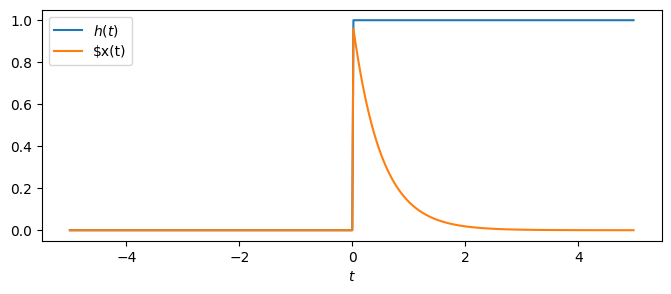

In [31]:
from scipy import integrate, signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import matplotlib.image as mpimg

# unit step function
h = lambda t:(t>0)*1.0
# x(t)
a = 2 
x = lambda t:(t>0)*np.exp(-a*t)

# Sampling frequency for plotting
Fs = 50
# Time Range
T = 5
# time samples
t = np.arange(-T, T, 1/Fs)

plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)')
plt.xlabel(r'$t$')
plt.legend()


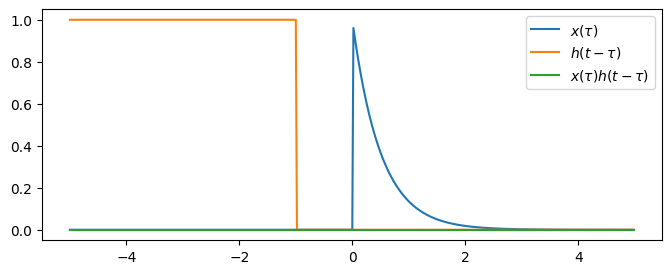

In [8]:
# plotting
t_ = -1
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

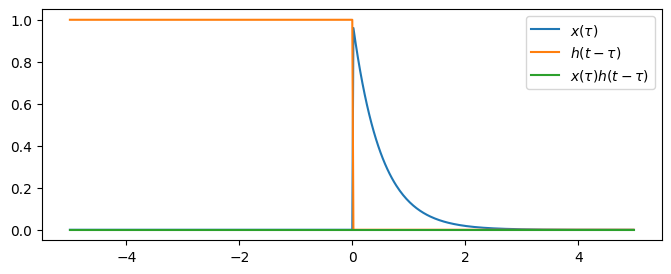

In [9]:
# plotting
t_ = 0
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

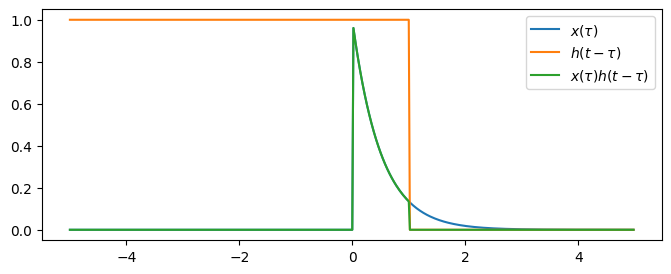

In [10]:
# plotting
t_ = 1
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
plt.legend()

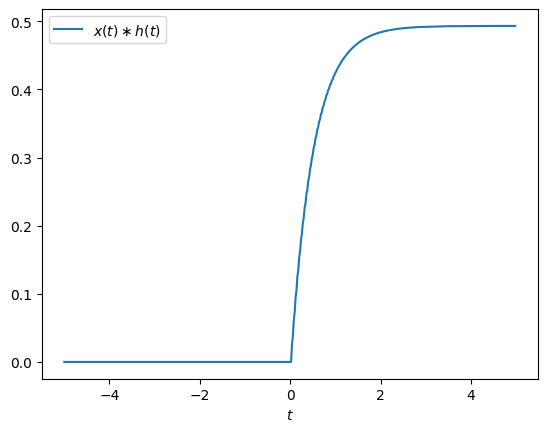

In [11]:
# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simpson(y = product(t), x = t)

plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()



### 3.1.2 Convolving with a Signal Composed of Impulse Functions
Approximated impuse function $\delta(t)$,
![](approxdeltat.png)

As,
$$\Delta  -> 0  $$
$$\delta_{\Delta}(t) -> \delta(t)$$


Approximate implementation of the $\delta(t)$ 

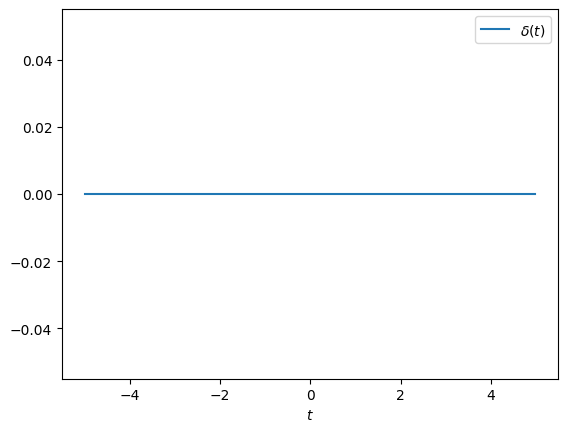

In [12]:
# Sampling Frequency
fs = 1000
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

plt.plot(t, delta(t), label=r'$\delta(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

Using Simpson's rule integration to finding the value of,

$$\int_{-\infty}^{\infty} \delta(t)dt$$

In [13]:
# Sampling frequency for plotting
Fs = 1000
# Time Range
T = 5
# time samples
t = np.arange(-T, T, 1/Fs)

y = integrate.simps(delta(t), t)

print(y)

1.000000000000334


C:\Users\PANKAJA\AppData\Local\Temp\ipykernel_19332\2545879376.py:8: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  y = integrate.simps(delta(t), t)


Consider,
$$x(t) = e^{-at}u(t) ,  a>o$$
and
$$h(t) = \delta(t+2)+\delta(t-1)$$

Finding expression for,
$$y(t) = x(t)*h(t)$$

$$y(t) = \int_{-\infty}^{\infty} x(\tau)h(t-\tau)d\tau$$
$$y(t) = \int_{-\infty}^{\infty} e^{-a\tau}u(\tau)(\delta(t-\tau+2)+\delta(t-\tau-1))d\tau$$
$$y(t) = e^{-a(t+2)}u(t+2)+e^{-a(t-1)}u(t-1)$$


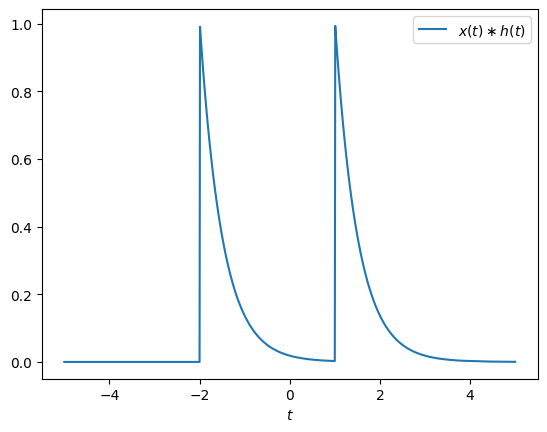

In [14]:
# x(t)
a = 2 
x = lambda t:(t>0)*np.exp(-a*t)

# h(t)
h = lambda t:delta(t+2) + delta(t-1)



# Sampling frequency for plotting
Fs = 1000
# Time Range
T = 5
# time samples
t = np.arange(-T, T, 1/Fs)

# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simpson(y = product(t), x = t)

plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()




## 3.1 Continuous-Time Systems: Convolution Integral
Using the convolution we can express the response of an LTI system to an arbitrary input in terms of the
system’s response to the unit impulse. An LTI system is completely characterized by its response to a single
signal, namely, its response to the unit impulse.

The convolution of the sequence $y[n]$ and $h[n-k]$ is given by
$$y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$$
Where $h[n]$ is the impulse response of the system and $x[n]$ is the input to the system.

This can be  symbolically represented as
$$y[n] = x[n]*h[n]$$
![](convImp.png)

There can be an overlap between $x[k]$ and $h[n-k]$  only when n $\epsilon$ [-5, 5] 

There for length of the array $y[n]$ is len(x) + len(h) - 1



Actual implementation of the convolution sum using
NumPy arrays.

In [15]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)

for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)

    hkmin = max(0, len(h) - n - 1)
    hkmax = min(len(h), len(x)+ len(h) - n - 1)

    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


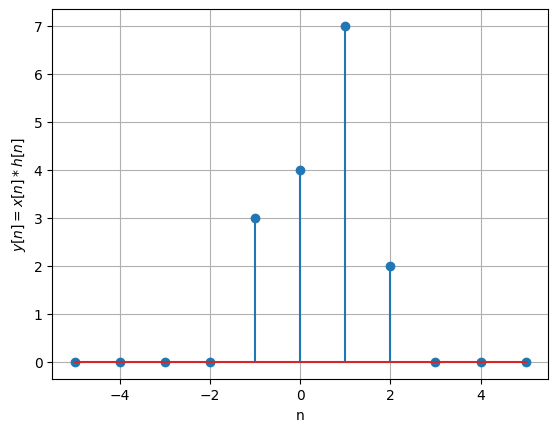

In [16]:
n = np.arange(-5, 6, 1)

fig, axes = plt.subplots()
axes.stem(n, y)
#axes.set_xlim(-20, 20)
axes.set_xlabel('n')
axes.set_ylabel('$y[n] =  x[n]*h[n]$')
axes.grid()
plt.show()

![](fog3.6.png)

Finding the convolution of above two sequences using the convolution sum.


In [17]:
x = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)

for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)

    hkmin = max(0, len(h) - n - 1)
    hkmax = min(len(h), len(x)+ len(h) - n - 1)

    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

y[0] = x[0:1]*h[8:9] = 0.0
y[1] = x[0:2]*h[7:9] = 0.0
y[2] = x[0:3]*h[6:9] = 0.0
y[3] = x[0:4]*h[5:9] = 0.0
y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0
y[13] = x[5:9]*h[0:4] = 0.0
y[14] = x[6:9]*h[0:3] = 0.0
y[15] = x[7:9]*h[0:2] = 0.0
y[16] = x[8:9]*h[0:1] = 0.0


Using scipy.signal.convolve

Text(0.5, 1.0, 'Same')

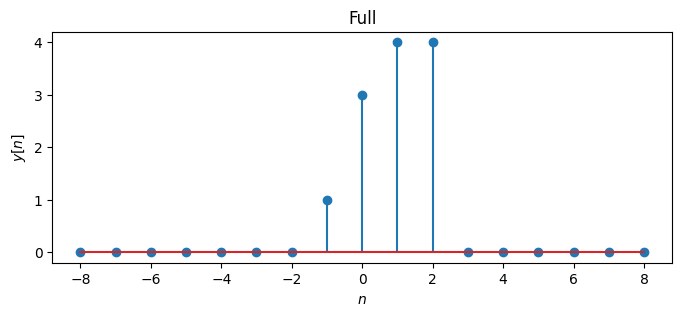

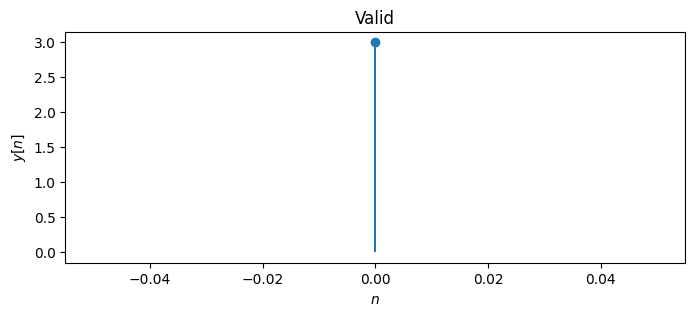

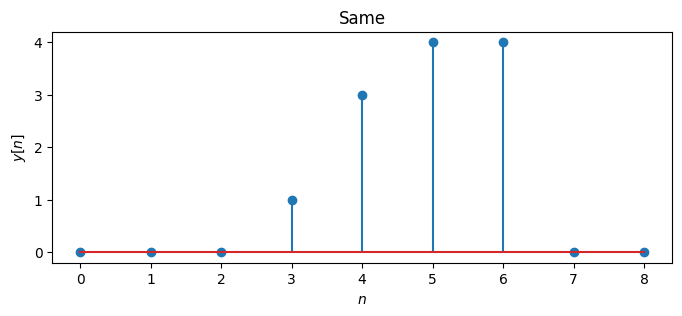

In [18]:
y1 = signal.convolve(x, h, mode='full', method='auto')
y2 = signal.convolve(x, h, mode='valid', method='auto')
y3 = signal.convolve(x, h, mode='same', method='auto')

n = np.arange(-8, 9, 1)
plt.figure(figsize=(8,3))
plt.stem(n, y1)
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.title('Full')

plt.figure(figsize=(8,3))
plt.stem(y2)
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.title('Valid')

plt.figure(figsize=(8,3))
plt.stem(y3)
plt.xlabel(r'$n$')
plt.ylabel(r'$y[n]$')
plt.title('Same')


## 3.3 An Application in Audio Signal Filtering


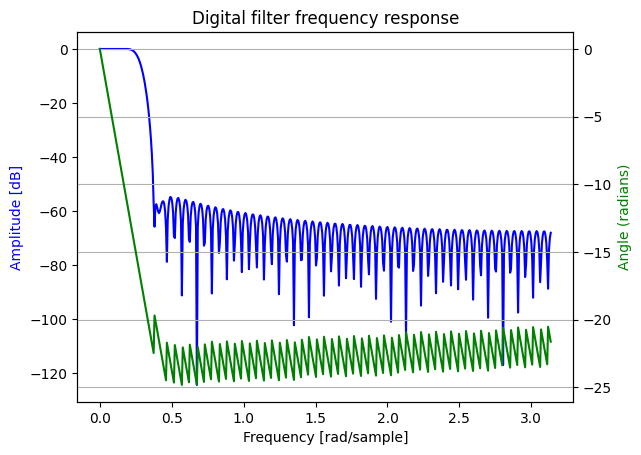

In [19]:
data, samplerate = sf.read('audio_file.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


#  Your code here for convolution.
ch1 = signal.convolve(data[:,0], b, mode='same')
ch2 = signal.convolve(data[:,1], b, mode='same')



sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)

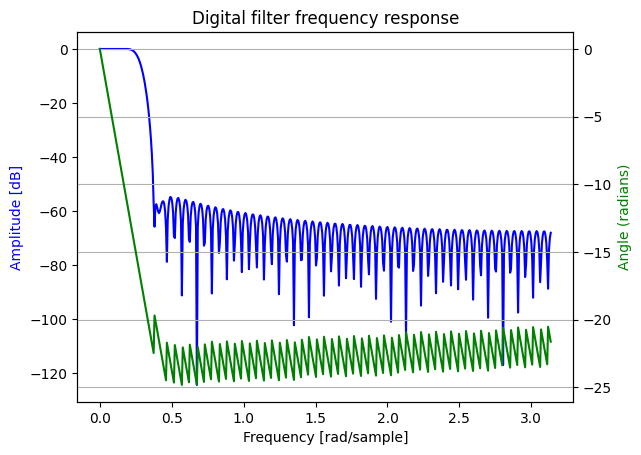

In [20]:
data, samplerate = sf.read('audio_file.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


# Your code here for convolution.
ch1 = signal.convolve(data[:,0], b, mode='same')
ch2 = signal.convolve(data[:,1], b, mode='same')

# Additional filtering effects
# Filter 1
b1 = signal.firwin(n, fc/2, pass_zero=True)
ch1_filtered_1 = signal.convolve(ch1, b1, mode='same')
ch2_filtered_1 = signal.convolve(ch2, b1, mode='same')

# Filter 2
b2 = signal.firwin(n, fc*2, pass_zero=True)
ch1_filtered_2 = signal.convolve(ch1, b2, mode='same')
ch2_filtered_2 = signal.convolve(ch2, b2, mode='same')

# Filter 3
b3 = signal.firwin(n, fc/4, pass_zero=True)
ch1_filtered_3 = signal.convolve(ch1, b3, mode='same')
ch2_filtered_3 = signal.convolve(ch2, b3, mode='same')

# Save the filtered audio
sf.write('audio_file_filtered_1.wav', np.vstack((ch1_filtered_1, ch2_filtered_1)).T + data, samplerate)
sf.write('audio_file_filtered_2.wav', np.vstack((ch1_filtered_2, ch2_filtered_2)).T + data, samplerate)
sf.write('audio_file_filtered_3.wav', np.vstack((ch1_filtered_3, ch2_filtered_3)).T + data, samplerate)


# 3.4 Convolution Sum in 2-D


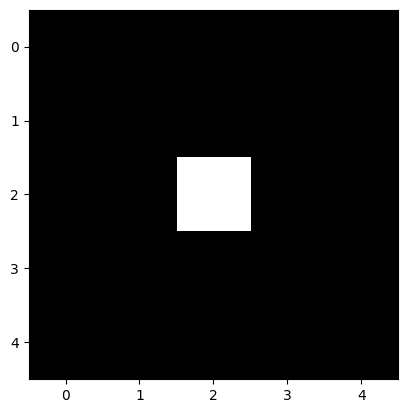

In [28]:
x = np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]])

plt.imshow(x, cmap='grey')

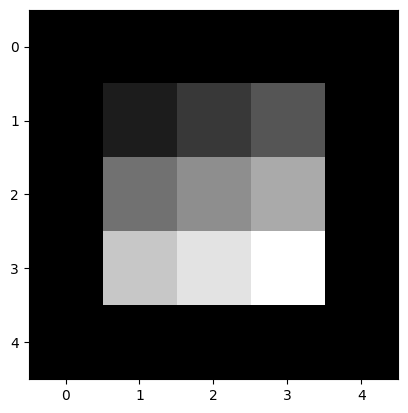

In [29]:
h = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

y = signal.convolve2d(x, h, mode='same')

plt.imshow(y, cmap='gray')

# 3.5 Application: Using Convolution to Filter an Image

ValueError: convolve2d inputs must both be 2-D arrays

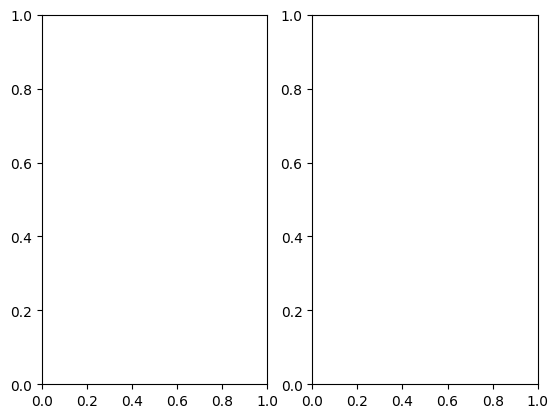

In [35]:
x = mpimg.imread('allenkeys.png')

fig, ax = plt.subplots(1,2)
h = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])
y = signal.convolve2d(x, h, mode='same')
ax[0].imshow(x, cmap='gray')
ax[1].imshow(y, cmap='gray')